## Unipept lowest common ancestor peptide analysis:

### This tool returns the taxonomic lowest common ancestor for a given tryptic peptide. Here we're running all our de novo (PeaksDN), database search (Comet) and de novo-assisted database searched peptides through to determine their specificity and ability to ID organismal and functional source.

### You can run the `pept2lca` command as part of a [web server](https://unipept.ugent.be/datasets) or using the command line interface ([info here](https://unipept.ugent.be/clidocs)).

### I exported the LCA results to a .csv and placed into my /analysis/unipept directory:

In [1]:
cd /home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/unipept/

/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/unipept


In [2]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [3]:
lca50 = pd.read_csv('MED2_combine_DN50_length_spec.csv')
lca80 = pd.read_csv('MED2_combine_DN80_length_spec.csv')
lcaC3 = pd.read_csv('MED2_combine_CometXCorr3_length_spec.csv')
lca20 = pd.read_csv('MED2_combine_PTM-opt_PeaksDB_20_length_spec.csv')

/home/millieginty/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,2,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Visualizing the LCA results:

In [4]:
lcalen50 = lca50[['xkingdom-len', 'kingdom-len', 'phylum-len', 'species-len']].copy()    
lcalen80 = lca80[['xkingdom-len', 'kingdom-len', 'phylum-len', 'species-len']].copy()  
lcalenC3 = lcaC3[['xkingdom-len', 'kingdom-len', 'phylum-len', 'species-len']].copy()  
lcalen20 = lca20[['xkingdom-len', 'kingdom-len', 'phylum-len', 'species-len']].copy() 

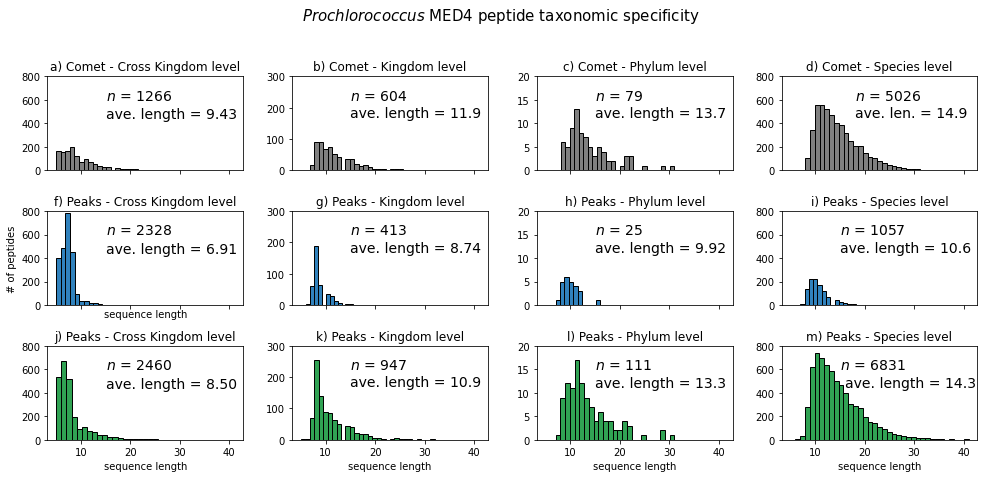

In [6]:
# plot Comet >XCorr 3 peptide taxonomic specificity per peptide length as histograms
# and plot DN80 Peaks peptides

fig, axs = plt.subplots(3, 4, figsize=(14, 6), sharex=True)

axs[0,0].hist(lcalenC3['xkingdom-len'], bins = 25, color='grey', edgecolor = 'black')
axs[0,0].set_ylim([0,800])
axs[0,0].set_title('a) Comet - Cross Kingdom level')
axs[0,0].text(15, 600, '$n$ = 1266', fontsize=14)
axs[0,0].text(15, 440, 'ave. length = 9.43', fontsize=14)
#axs[0,0].set_ylabel('# of peptides')
#axs[0,0].set_xlabel('sequence length')

axs[0,1].hist(lcalenC3['kingdom-len'], bins = 30, color='grey', edgecolor = 'black')
axs[0,1].set_ylim([0,300])
axs[0,1].set_title('b) Comet - Kingdom level')
axs[0,1].text(15, 225, '$n$ = 604', fontsize=14)
axs[0,1].text(15, 170, 'ave. length = 11.9', fontsize=14)
#axs[0,1].set_xlabel('sequence length')

axs[0,2].hist(lcalenC3['phylum-len'], bins = 25, color='grey', edgecolor = 'black')
axs[0,2].set_ylim([0,20])
axs[0,2].set_title('c) Comet - Phylum level')
axs[0,2].text(15, 15, '$n$ = 79', fontsize=14)
axs[0,2].text(15, 11.3, 'ave. length = 13.7', fontsize=14)
#axs[0,2].set_xlabel('sequence length')

axs[0,3].hist(lcalenC3['species-len'], bins = 35, color='grey', edgecolor = 'black')
axs[0,3].set_ylim([0,800])
axs[0,3].set_title('d) Comet - Species level')
axs[0,3].text(18, 600, '$n$ = 5026', fontsize=14)
axs[0,3].text(18, 450, 'ave. len. = 14.9', fontsize=14)
#axs[0,3].set_xlabel('sequence length')

axs[1,0].hist(lcalen80['xkingdom-len'], bins = 15, color='#3182bd', edgecolor = 'black')
axs[1,0].set_ylim([0,800])
axs[1,0].set_title('f) Peaks - Cross Kingdom level')
axs[1,0].set_ylabel('# of peptides')
axs[1,0].text(15, 600, '$n$ = 2328', fontsize=14)
axs[1,0].text(15, 440, 'ave. length = 6.91', fontsize=14)
axs[1,0].set_xlabel('sequence length')

axs[1,1].hist(lcalen80['kingdom-len'], bins = 15, color='#3182bd', edgecolor = 'black')
axs[1,1].set_ylim([0,300])
axs[1,1].set_title('g) Peaks - Kingdom level')
axs[1,1].text(15, 225, '$n$ = 413', fontsize=14)
axs[1,1].text(15, 170, 'ave. length = 8.74', fontsize=14)
#axs[1,1].set_xlabel('sequence length')

axs[1,2].hist(lcalen80['phylum-len'], bins = 10, color='#3182bd', edgecolor = 'black')
axs[1,2].set_ylim([0,20])
axs[1,2].set_title('h) Peaks - Phylum level')
axs[1,2].text(15, 15, '$n$ = 25', fontsize=14)
axs[1,2].text(15, 11.3, 'ave. length = 9.92', fontsize=14)
#axs[1,2].set_xlabel('sequence length')

axs[1,3].hist(lcalen80['species-len'], bins = 15, color='#3182bd', edgecolor = 'black')
axs[1,3].set_ylim([0,800])
axs[1,3].set_title('i) Peaks - Species level')
axs[1,3].text(15, 600, '$n$ = 1057', fontsize=14)
axs[1,3].text(15, 450, 'ave. length = 10.6', fontsize=14)
#axs[1,3].set_xlabel('sequence length')

axs[2,0].hist(lcalen20['xkingdom-len'], bins = 30, color='#31a354', edgecolor = 'black')
axs[2,0].set_ylim([0,800])
axs[2,0].set_title('j) Peaks - Cross Kingdom level')
#axs[2,0].set_ylabel('# of peptides')
axs[2,0].text(15, 600, '$n$ = 2460', fontsize=14)
axs[2,0].text(15, 440, 'ave. length = 8.50', fontsize=14)
axs[2,0].set_xlabel('sequence length')

axs[2,1].hist(lcalen20['kingdom-len'], bins = 30, color='#31a354', edgecolor = 'black')
axs[2,1].set_ylim([0,300])
axs[2,1].set_title('k) Peaks - Kingdom level')
axs[2,1].set_xlabel('sequence length')
axs[2,1].text(15, 225, '$n$ = 947', fontsize=14)
axs[2,1].text(15, 170, 'ave. length = 10.9', fontsize=14)

axs[2,2].hist(lcalen20['phylum-len'], bins = 25, color='#31a354', edgecolor = 'black')
axs[2,2].set_ylim([0,20])
axs[2,2].set_title('l) Peaks - Phylum level')
axs[2,2].set_xlabel('sequence length')
axs[2,2].text(15, 15, '$n$ = 111', fontsize=14)
axs[2,2].text(15, 11.3, 'ave. length = 13.3', fontsize=14)

axs[2,3].hist(lcalen20['species-len'], bins = 36, color='#31a354', edgecolor = 'black')
axs[2,3].set_ylim([0,800])
axs[2,3].set_title('m) Peaks - Species level')
axs[2,3].set_xlabel('sequence length')
axs[2,3].text(15, 600, '$n$ = 6831', fontsize=14)
axs[2,3].text(16, 450, 'ave. length = 14.3', fontsize=14)

fig.suptitle('$Prochlorococcus$ MED4 peptide taxonomic specificity', y = 1.1, size = 15)
plt.subplots_adjust(top=0.80)

plt.tight_layout()

plt.savefig("MED4-Comet_Peaks-taxa-hist.png")

# also save in manuscript latex dir high res
plt.savefig("/home/millieginty/Documents/med-manuscripts/de-novo-etnp/rewrite-may2020/AGU/MED-AGU/MED4_LCA", dpi = 300, bbox_inches='tight')